## Week 2: Classification of Cats and Dogs

The dataset used for this activity comes from [Asirra](https://paperswithcode.com/dataset/asirra), a CAPTCHA challenge in which users must identify pictures of either cats or dogs to be granted access to a system. The original dataset is over 3 million images in size, but this condensed 25K image dataset has been published to Kaggle.

To run this notebook yourself, you will need to replace all Google Drive paths with your own cloud or local paths.

### 1) Data setup and visualization

In [ ]:
#Load data for visualization and summary
from scipy import stats
import torch
from torch import nn #create nn classifier

#Visualization requirements
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
import os
import random
from IPython.display import display

In [ ]:
#Install tqdm for progress bars
!pip install tqdm
from tqdm import tqdm

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#Change directory
%cd "/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/PetImages"

/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/PetImages


In [ ]:
#Create transformations


In [ ]:
#Visualize a random cat and dog image to guage some of the differences.
file_path = Path("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/PetImages")

cat_path = Path('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/PetImages/Cat')
dog_path = file_path / "Dog"

In [ ]:
#Create a glob to aggregate all images, and then visualize a random image or sample. This is for cats.
cat_dir_list = list(cat_path.glob('*.jpg'))

In [ ]:
#Create a glob to aggregate all images, and then visualize a random image or sample. This is for dogs.
dog_dir_list = list(dog_path.glob('*.jpg'))

In [ ]:
#Check lengths of each
print(len(cat_dir_list))
print(len(dog_dir_list))

12499
12499


Number of files in directory is currently non-zero.
Selected image: /content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/PetImages/Cat/10185.jpg
Class: cat | File name: 10185.jpg


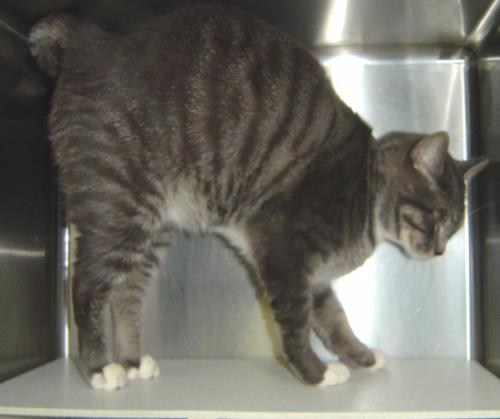

In [ ]:
#Use PIL to plot a random cat and dog image
if (len(cat_dir_list) != 0):
  print("Number of files in directory is currently non-zero.")
  current_cat_path = random.choice(cat_dir_list)
  print(f"Selected image: {current_cat_path}")
  random_cat_image = Image.open(current_cat_path)

  #Get the name of the file and print
  cat_file_name = str(current_cat_path)[str(current_cat_path).rfind("/") + 1 :]
  cat_id = cat_file_name[: cat_file_name.rfind(".")]
  print(f"Class: cat | File name: {cat_file_name}")

  display(random_cat_image) #The manual display helps overcome JN's flaws
else:
  print(f"The number of files of cat images is currently {len(cat_dir_list)}.")
  current_cat_path = ""

Number of files in directory is currently non-zero.
Selected image: /content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/PetImages/Dog/615.jpg
Class: dog | File name: 615.jpg


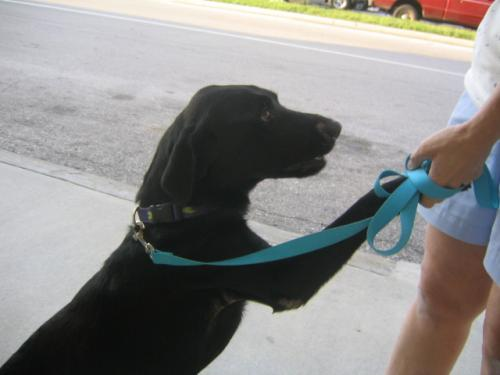

In [ ]:
if (len(dog_dir_list) != 0):
  print("Number of files in directory is currently non-zero.")
  current_dog_path = random.choice(dog_dir_list)
  print(f"Selected image: {current_dog_path}")
  random_dog_image = Image.open(current_dog_path)

  #Get the name of the file and print
  dog_file_name = str(current_dog_path)[str(current_dog_path).rfind("/") + 1 :]
  dog_id = dog_file_name[: dog_file_name.rfind(".")]
  print(f"Class: dog | File name: {dog_file_name}")

  display(random_dog_image) #The manual display helps overcome JN's flaws
else:
  print(f"The number of files of dog images is currently {len(dog_dir_list)}.")
  current_dog_path = ""

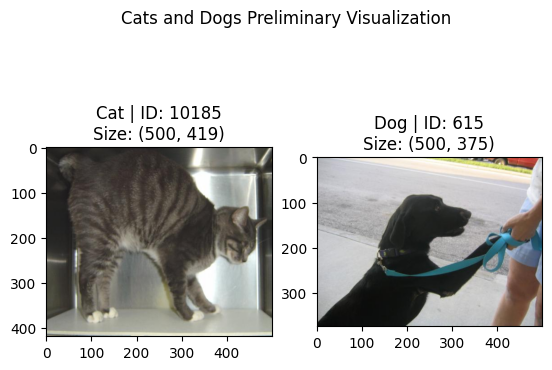

In [ ]:
#Visualize in matplotlib
images_list = [current_cat_path, current_dog_path] #Create a list of both paths

#Create matplotlib subplots and visualize image
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].imshow(Image.open(images_list[0]))
ax[0].set_title(f"Cat | ID: {cat_id}\nSize: {Image.open(images_list[0]).size}")
ax[1].imshow(Image.open(images_list[1]))
ax[1].set_title(f"Dog | ID: {dog_id}\nSize: {Image.open(images_list[1]).size}")

plt.suptitle("Cats and Dogs Preliminary Visualization")

fig.show()

In [ ]:
!pip install dask

In [ ]:
#Size of each image, as H / W
import dask.dataframe as dd #speeds up computation

#Create a cats index

entry_stem_size = 108 #set macro

counter = 0

classes = []
ids = []
heights = []
widths = []
areas = []

for entry in tqdm(cat_dir_list):

    #Error: some images cannot be opened (they are nonexistent)
    try:

      if (Image.open(entry)):

        class_name = str(entry)[entry_stem_size + 1 : entry_stem_size + 4] #all paths are the same length and stem, so this can be done
        classes.append(class_name)

        file_name = str(entry)[str(entry).rfind("/") + 1 :]
        id = file_name[: file_name.rfind(".")]
        ids.append(id)

        height = (Image.open(entry).size)[1]
        heights.append(height)

        width = (Image.open(entry).size)[0]
        widths.append(width)

        area = height * width,
        areas.append(area)

        counter += 1

    except:

      continue

#Create the dataframe
size_dict_cats = {"Class" : classes, "ID" : ids, "Height" : heights, "Width" : widths, "Area" : areas}

size_data_frame_cats = dd.DataFrame(size_dict_cats)
print("Finished dataset preparation: cats")

KeyboardInterrupt: 

In [ ]:
#Create a dogs index

entry_stem_size = 108 #set macro

counter = 0

classes = []
ids = []
heights = []
widths = []
areas = []

for entry in tqdm(dog_dir_list):

    #Error: some images cannot be opened (they are nonexistent)
    try:

      if (Image.open(entry)):

        class_name = str(entry)[entry_stem_size + 1 : entry_stem_size + 4] #all paths are the same length and stem, so this can be done
        classes.append(class_name)

        file_name = str(entry)[str(entry).rfind("/") + 1 :]
        id = file_name[: file_name.rfind(".")]
        ids.append(id)

        height = (Image.open(entry).size)[1]
        heights.append(height)

        width = (Image.open(entry).size)[0]
        widths.append(width)

        area = height * width,
        areas.append(area)

        counter += 1

    except:

      continue

#Create the dataframe
size_dict = {"Class" : classes, "ID" : ids, "Height" : heights, "Width" : widths, "Area" : areas}

size_data_frame_dogs = dd.DataFrame(size_dict)
print("Finished dataset preparation: dogs")

In [ ]:
#Compute and concatenate
import pandas as pd
dog_sizes_dask = dd.DataFrame.from_dict(size_dict, npartitions=1)
cats_sizes_dask = dd.DataFrame.from_dict(size_dict_cats, npartitions = 1)

In [ ]:
#Export dataframes
cats_sizes_dask.to_csv("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/cats.csv")
dog_sizes_dask.to_csv("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/dogs.csv")

In [ ]:
#Concatenate both lists
import pandas as pd

cats_csv = pd.read_csv("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/cats.csv/cats_data.csv")
dogs_csv = pd.read_csv("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/dogs.csv/dogs_data.csv")

#Concatenate into dataset
final_dataset = pd.concat([cats_csv, dogs_csv])

In [ ]:
#Export to CSV
final_dataset.to_csv("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/cats_and_dog_sizes.csv")

In [ ]:
#In case of errors...
final_dataset = pd.read_csv("/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/cats_and_dog_sizes.csv")

Text(0, 0.5, 'Height (pixels)')

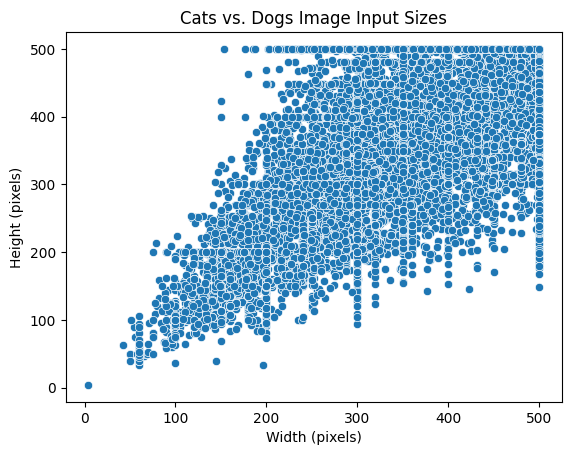

In [ ]:
#HW plot, no hue
hw_viz = sns.scatterplot(data = final_dataset, x = "Width", y = "Height")
hw_viz.set_title("Cats vs. Dogs Image Input Sizes")
hw_viz.set_xlabel("Width (pixels)")
hw_viz.set_ylabel("Height (pixels)")

Text(0, 0.5, 'Height (pixels)')

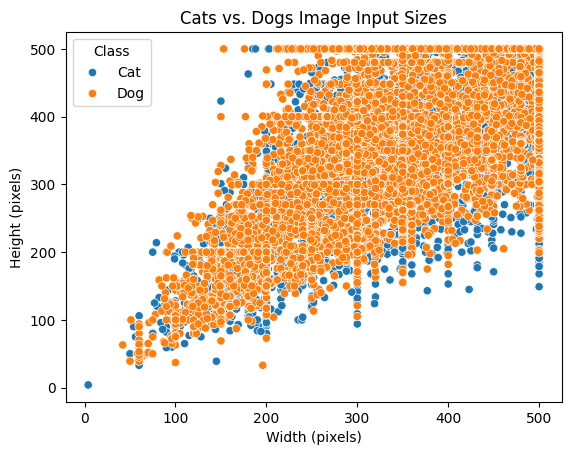

In [ ]:
#HW plot, with hue
hw_viz_2 = sns.scatterplot(data = final_dataset, x = "Width", y = "Height", hue = "Class")
hw_viz_2.set_title("Cats vs. Dogs Image Input Sizes")
hw_viz_2.set_xlabel("Width (pixels)")
hw_viz_2.set_ylabel("Height (pixels)")

Text(0.5, 0, 'Area (pixels^2)')

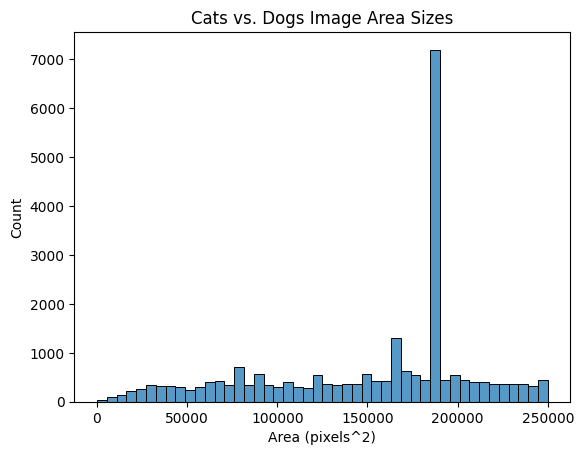

In [ ]:
#Area plot hist
area_viz = sns.histplot(data = final_dataset, x = "Area")
area_viz.set_title("Cats vs. Dogs Image Area Sizes")
area_viz.set_xlabel("Area (pixels^2)")

### 2) Data preprocessing

Creating dataloaders and applying relevant transformations to images so they may be input into various model architectures.

In [ ]:
#Calculating mean and standard deviations of original images to apply to tensor
import numpy as np

c_red = []
c_green = []
c_blue = []

#Iterate through images for mean, std -- is there a quicker way to do this?

In [ ]:
#Creating a custom transformation, starting with a size of 224
from torchvision import transforms
from torchvision.transforms import ToTensor

model_1_transform = transforms.Compose([
    lambda x : x.convert('RGB'), #lambda function to convert image to RGB from palette; Gemini suggestion
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.RandAugment(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]) #This must be included as the last transform
])

NameError: name 'images_list' is not defined

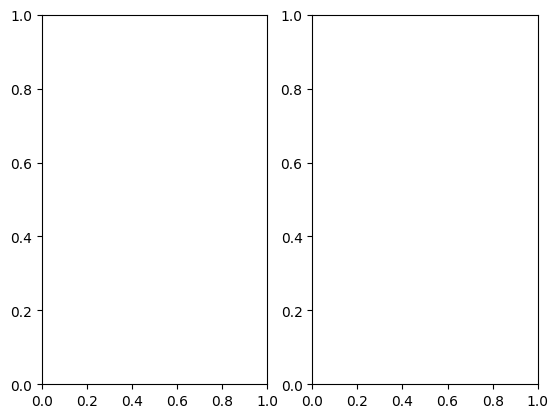

In [ ]:
#Create matplotlib subplots and visualize image
fig, ax = plt.subplots(nrows = 1, ncols = 2)

cat_image = Image.open(images_list[0])
cat_image_transformed = model_1_transform(cat_image).permute(1, 2, 0).to(dtype=torch.uint8)

dog_image = Image.open(images_list[1])
dog_image_transformed = model_1_transform(dog_image).permute(1, 2, 0).to(dtype=torch.uint8)

ax[0].imshow(cat_image_transformed)
ax[0].set_title(f"Cat | ID: {cat_id}\nSize: {cat_image_transformed.shape}") #Get the new tensor shape
ax[1].imshow(dog_image_transformed) #Need to change the channels
ax[1].set_title(f"Dog | ID: {dog_id}\nSize: {dog_image_transformed.shape}") #Get the new tensor shape

plt.suptitle("Cats and Dogs Transformed Visualization")

fig.show()

In [ ]:
#Use split-folders to create custom splits
!pip install split-folders[full]

In [ ]:
#Create splits
import torch.utils.data.dataloader
from random import sample
import splitfolders #alternative to scikit-learn's train-test-split

TEST_AMOUNT = 0.2 #20% testing data

#Source directories
file_path = file_path

#Using split folders library
splitfolders.ratio(file_path, output="/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/Outputs",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)


Copying files: 25000 files [28:05, 14.84 files/s]


In [ ]:
#Review class names using helper function from Custom Datasets
from typing import List, Tuple, Dict

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  '''Returns class holder names in target directory'''

  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes: #raise an exception if this is empty
    raise FileNotFoundError(f"Couldn't find any files in target directory: {directory}.")

  #Dictionary of index labels
  classes_to_idx = {class_name : i for i, class_name in enumerate(classes)} #enumerate through classes and return key-value pairs
  return classes, classes_to_idx


In [ ]:
#Test / train directory
data_dir = "/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/Outputs/train"

In [ ]:
#Create a list of class names and indexes
classes, classes_to_idx = find_classes(data_dir)

classes, classes_to_idx #Creates a dictionary of class labels to use when training

(['Cat', 'Dog'], {'Cat': 0, 'Dog': 1})

In [ ]:
#Custom dataset definition, from "Custom Datasets" section of Bourke course
import pathlib
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset): #inherits from Dataset

  #initialize dataset
  def __init__(self, targ_dir:str, transform=None): #establish defaults

    #Create class attributes
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) #search for directory paths matching this format
    self.transform = transform #transform input path
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    ''' Opens image via path and returns it. '''
    image_path = self.paths[index]
    return Image.open(image_path).convert('RGB')

  #Overwrite len: return num_samples
  def __len__(self) -> int:
    '''Return number of samples'''
    return len(self.paths)

  #Overwrite get_item
  def __getitem__(self, index:int) -> Tuple[torch.tensor, int]:
    #Replicate image indexing
    '''Return sample of data and label, (x,y) '''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform: #if transform exists
      return self.transform(img), class_idx #return tuple
    else:
      return img, class_idx

In [ ]:
#Data loader creation
data_dir_train = data_dir
data_dir_test = "/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/Outputs/val"

#Create the custom dataset from train/validation images
train_data = ImageFolderCustom(targ_dir = data_dir_train, transform = model_1_transform)
test_data = ImageFolderCustom(targ_dir = data_dir_test, transform = None) #No transform applied to test data

#Using batch size of 32 for speed
train_dataloader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 32, num_workers = os.cpu_count(), #try with 0 workers
                                               shuffle = True)
test_dataloader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 32, num_workers = os.cpu_count(),
                                              shuffle = False)

#Check train and test dataloaders
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d546d83da10>,
 <torch.utils.data.dataloader.DataLoader at 0x7d54616d9650>)

In [ ]:
#Check a random training data value
img_ex, label_ex = next(iter(train_dataloader))

img_ex.shape, label_ex.shape #In the form of batch, color, image, image

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/tmp/ipython-input-8-1571948529.py", line 33, in __getitem__
    return self.transform(img), class_idx #return tuple
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
          ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1739, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1750, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/autoaugment.py", line 363, in forward
    img = _apply_op(img, op_name, magnitude, interpolation=self.interpolation, fill=fill)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/autoaugment.py", line 79, in _apply_op
    img = F.solarize(img, magnitude)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional.py", line 1448, in solarize
    return F_t.solarize(img, threshold)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/_functional_tensor.py", line 803, in solarize
    raise TypeError("Threshold should be less than bound of img.")
TypeError: Threshold should be less than bound of img.


Text(0.5, 1.0, 'Class: Dog')

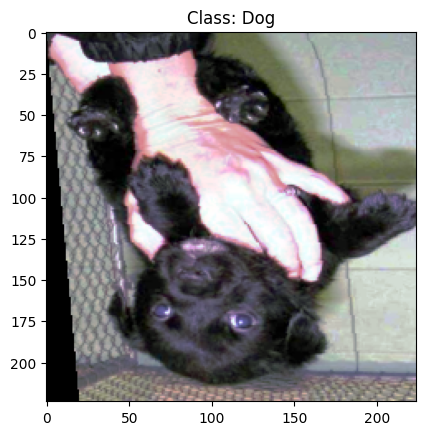

In [ ]:
#Plot a random image with its data label
import random

random_image_val = random.randrange(0, 31)

plt.imshow(img_ex[random_image_val].squeeze(dim = 0).permute(1, 2, 0)),
plt.title(f"Class: {classes[label_ex[random_image_val]]}")

### 3) Model Creation and Optimization

Training a transformer-class model and testing it against time. How does transfer learning improve efficiency?

In [ ]:
#Custom patch block class (nn.Conv2d, nn.Flatten) for use later
class MultiHeadedSelfAttentionBlock(nn.Module):
  '''Multi-headed self attention block for image weights'''

  #Initialize an object of the class
  def __init__(self, embedding_dim: int = 768, num_heads: int = 12, #number of self-attention heads
               attn_dropout: int = 0):

    #super call
    super().__init__()

    #Create layer norm
    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

    #Creating MSA block (takes in outputs of layer norm as input)
    self.multihead_attention = nn.MultiheadAttention(embed_dim = embedding_dim,
                                                     num_heads=num_heads,
                                                     dropout = attn_dropout,
                                                     batch_first=True)

  #Define the forward method and conduct the forward pass
  def forward(self, x):

    #Pass through layer normalization
    x = self.layer_norm(x)

    #Pass through MSA
    attn_output, _ = self.multihead_attention(query = x,
                                              key = x,
                                              value = x,
                                              need_weights = False) #Ignore the weights by creating an unaccessible variable + need_weights = False

    return attn_output #return the MSA output

In [ ]:
#Creating MLP block class
class MLPBlock(nn.Module):
  def __init__(self,
               embedding_dim: int = 768,
               hidden_size: int = 3072, #comes from table in paper
               dropout: int = 0.1):

    #Initialize the clas
    super().__init__()

    #Create normalization layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)

    #Create the MLP
    self.mlp = nn.Sequential(
        nn.Linear(in_features = embedding_dim, out_features = hidden_size),

        #Add GELU nonlinearity
        nn.GELU(),

        #Add dropout
        nn.Dropout(p = dropout), #10% of layers dropped out

        nn.Linear(in_features = hidden_size, out_features = embedding_dim), #in features of subsequent layer needs to match with output of previous

        #Add another dropout
        nn.Dropout(p = dropout)
    )

  #Create the forward method
  def forward(self, x):
    x = self.layer_norm(x)

    x = self.mlp(x)

    #Could also be done in a single hit.

    #Return the value of x after its passage through all layers
    return x

In [ ]:
#Custom transformer block
class TransformerEncoder(nn.Module):
  def __init__(self,
               embedding_dim: int = 768,
               num_heads: int = 12,
               mlp_size: int = 3072,
               mlp_dropout: int = 0.1,
               attn_dropout: int = 0): #no dropout for self-attention layers

    #Initialize an object of this class
    super().__init__()

    #Create MSA block using previous definition and declaration
    self.msa_block = MultiHeadedSelfAttentionBlock(embedding_dim = embedding_dim,
                                                   num_heads = num_heads,
                                                   attn_dropout = attn_dropout) #Creates the MSA block


    #Creating MLP with same approach
    self.mlp_block = MLPBlock(embedding_dim=embedding_dim,
                              hidden_size = mlp_size,
                              dropout = mlp_dropout)

  #Stitch everything together with forward method
  def forward(self, x):
    x = self.msa_block(x) + x #residual connection: add the input to output

    x = self.mlp_block(x) + x

    #Return residuals
    return x


In [ ]:
#Patch embedding
class PatchEmbedding(nn.Module):

  #Initialize the layer with hyperparameters (initialization)
  def __init__(self, in_channels: int=3, #output size is the patch size
               patch_size: int=16,
               embedding_dim: int=768 #out channels, taken from ViT-base in paper
               ):

    super().__init__() #initialize an object of the class

    #Initialize patch size
    self.patch_size = patch_size

    #Turn the image into patched layer
    self.patched = nn.Conv2d(in_channels = in_channels,
                             out_channels = embedding_dim,
                             kernel_size = patch_size, #image is as large as patch
                             stride = patch_size, #move over by size of patch
                             padding = 0) #depth of the outline is 0, none; This layer serves the same functionality as the experimentation conducted above

    #Flatten feature map outputs
    self.flatten = nn.Flatten(start_dim = 2, end_dim = 3)

  #Define the forward pass
  def forward(self, x):

    #What's the image resolution? Make sure that it is compatible with patch size
    image_resolution = x.shape[-1]
    assert image_resolution % self.patch_size == 0, f"Image size must be divisible by {self.patch_size}" #Patch is a square or rectangle, and must fit evenly within image res

    #Perform the forward pass. The assertion must have succeeded.
    x_patched = self.patched(x) #perform on self; x is an instance of self
    x_flattened = self.flatten(x_patched)

    #Permute returned dimensions
    return x_flattened.permute(0, 2, 1)

    #Test by passing in an image.

In [ ]:
'''
This is the PyTorch implementation of the vision transformer model introduced in the paper
"An Image is Worth 16x16 Words." I worked on this code while working on Daniel Bourke's PyTorch bootcamp during my second week (last week).
'''

class TransformerModelV1(nn.Module):

    #Initialize an object of the class
    def __init__(self,
                image_size: int = 224, #image size
                in_channels: int = 3, #for color images
                patch_size: int = 16, #image size must be divisible by patch size
                num_transformer_layers: int = 12, #number of transformer layers to be added; this controls the list comprehension loop below
                embedding_dim: int = 768, #hidden size D
                mlp_size: int = 3072,
                num_heads: int = 12, #number of heads for MSA block
                attn_dropout: int = 0, #neuron dropout rate
                mlp_dropout: int = 0.1, #regularization
                embedding_dropout: int = 0.1, #for patch and position embeddings
                num_classes: int = 2 #this will affect the output shape of labels
                ):

      super().__init__()

      #Ensure divisibility
      assert(image_size % patch_size == 0, "Not compatible!")

      #Calculate the number of patches (used for position embeddings)
      self.num_patches = ((image_size * image_size) // patch_size ** 2)

      #Prepend learnable class embedding
      self.class_embedding = nn.Parameter(data = torch.randn(1, 1, embedding_dim), requires_grad = True) #create with randn this time; optimized over time with grad descent

      #Learnable position embedding
      self.position_embedding = nn.Parameter(data = torch.randn(1, self.num_patches + 1, embedding_dim)) #The second dimension must equal patches_num + 1.

      #Create the dropout
      self.embedding_dropout = nn.Dropout(p = embedding_dropout) #The probability of dropout is equal to 0.1

      #Create patch embedding layer
      self.patch_embedding = PatchEmbedding(in_channels = in_channels,
                                            patch_size = patch_size,
                                            embedding_dim = embedding_dim) #This reusable block of code was created previously

      #Create Transformer Encoder block by looping through all transformer encoders in a list, for range 12.

      #Previous: this was not working.
      '''self.transformer_encoder = nn.Sequential([TransformerEncoder(embedding_dim = embedding_dim,
                                                                    num_heads= num_heads,
                                                                    mlp_size = mlp_size,
                                                                    mlp_dropout= mlp_dropout,
                                                                    attn_dropout = attn_dropout)] for _ in range(num_transformer_layers))'''

      #This works.
      self.transformer_encoder = nn.Sequential(*[TransformerEncoder(embedding_dim=embedding_dim,
                                                                              num_heads=num_heads,
                                                                              mlp_size=mlp_size,
                                                                              mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)]) #forgot the ] closer

      #Creating classifier head: outputs predicted classification of image
      self.classifier = nn.Sequential(
          nn.LayerNorm(normalized_shape = embedding_dim),
          nn.Linear(in_features = embedding_dim, #this is taken as the output of the previous layer
                    out_features = num_classes) #This will be outputting the class prediction
      )

    #Create the ViT forward method
    def forward(self, x):

      #Calculate batch size
      batch_size = x.shape[0]

      #Create class token embedding; but avoid hardcoding. ** This needs to match the batch size for easy concatenation. **
      class_token = self.class_embedding.expand(batch_size, -1, -1) #Dimensions for 1, 2 are inferred.

      #Patch embedding from equation 1
      x = self.patch_embedding(x)

      #Concatenate embeddings with torch.concat
      x = torch.cat((class_token, x), dim = 1) #concatenate along the first dimension, which is number of patches

      #Add the positional embedding
      x = self.position_embedding + x #simple concat

      #Add embedding dropout
      x = self.embedding_dropout(x)

      #Embedding concats need to be passed to transformer encoder
      x = self.transformer_encoder(x)

      #Pass to MLP head (0th index logit)
      x = self.classifier(x[:, 0])

      #Return the completed computation, one-hot encoded
      return x

<>:26: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:26: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipython-input-19-2321784978.py:26: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(image_size % patch_size == 0, "Not compatible!")


In [ ]:
transformer_model_def = TransformerModelV1()

transformer_model_def

TransformerModelV1(
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (patch_embedding): PatchEmbedding(
    (patched): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (transformer_encoder): Sequential(
    (0): TransformerEncoder(
      (msa_block): MultiHeadedSelfAttentionBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (multihead_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (mlp_block): MLPBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )

In [ ]:
#Summary writer
!pip install torchinfo
from torchinfo import summary

summary(model = transformer_model_def,
        input_size = (1, 3, 224, 224), #input size has changed to Batch_size, color_channels, H, W
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 20,
        row_settings = ["var_names"]
        )

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
TransformerModelV1 (TransformerModelV1)                           [1, 3, 224, 224]     [1, 1000]            152,064              True
├─PatchEmbedding (patch_embedding)                                [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patched)                                           [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                          [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                                [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoder (0)                                

In [ ]:
#Create loss function and optimizer for later use
loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = transformer_model_def.parameters(), lr = 0.001)

### 4) V0 Model Training and Predictions

Creating a training loop to visualize model loss, accuracy values over time.

In [ ]:
#Import Daniel Bourke's helper functions: engine, plot loss curves
#https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular


"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

In [ ]:
#Helper function #2: plot loss curves
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


In [ ]:
#Check device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
#Run training/testing loop and save results to dict
results_dict_baseline = train(
    model = transformer_model_def,
    train_dataloader = train_dataloader,
    test_dataloader = test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_function,
    epochs = 5,
    device = device
)

#Current issue: target shape error ([32] and [32, 1000])

  0%|          | 0/5 [00:00<?, ?it/s]

UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/tmp/ipython-input-13-3034523931.py", line 28, in __getitem__
    img = self.load_image(index)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-13-3034523931.py", line 17, in load_image
    return Image.open(image_path)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3572, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/Outputs/train/Dog/11702.jpg'


In [ ]:
#Plot the results of the model and save parameters to .pth file

### 5) ViT With Pretrained Weights and Fine-Tuning

Using HuggingFace's hub API, "trainer" can be deployed to fine-tune model hyperparameters, specifically learning rate, dropout, batch sizes, etc. This is something to consider when fine-tuning our anomaly detection model.

In [ ]:
import torch, torchvision

#Retrieve ViT Base weights from PyTorch hub
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT #Extract the best available weights

#Create a new ViT model instance with the weights extracted
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 294MB/s]


In [ ]:
#Freeze parameters
for parameter in pretrained_vit.parameters():
  parameter.requires_grad = False

pretrained_vit.heads = nn.Linear(in_features = 768, out_features = 2).to(device)

In [ ]:
#Retrieve model transforms from Torchvision library
vit_transforms = pretrained_vit_weights.transforms()

In [ ]:
#Display model transforms
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
#Create a smaller sample of testing and training data
from torch.utils.data import RandomSampler, Subset, DataLoader
from torchvision import datasets

#Create random list of indices
sampler_train = RandomSampler(train_data, num_samples = 1000, replacement = False)
test_sampler = RandomSampler(test_data, num_samples = 250, replacement = False)

dataset_subset_train = datasets.ImageFolder('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/Outputs/train', transform=vit_transforms)
dataset_subset_test = datasets.ImageFolder('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/kagglecatsanddogs_5340.zip (Unzipped Files)/Outputs/val', transform=vit_transforms)

dataset_subset_train = DataLoader(dataset_subset_train,  batch_size = 32, sampler = sampler_train)
dataset_subset_test = DataLoader(dataset_subset_test, batch_size = 32, sampler = test_sampler)

The size of this image is: torch.Size([32, 3, 224, 224])


Text(0.5, 1.0, 'Class: Dog')

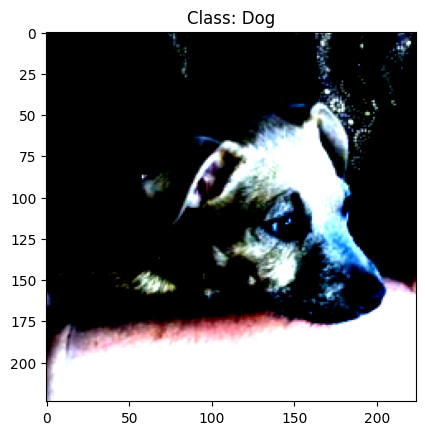

In [ ]:
#Plot the ViT transform on a particular image
img_example_2, label_example_2 = next(iter(dataset_subset_train))

print(f"The size of this image is: {img_example_2.shape}")

import random

random_image_val_2 = random.randrange(0, 31)

plt.imshow(img_example_2[random_image_val_2].squeeze(dim = 0).permute(1, 2, 0)),
plt.title(f"Class: {classes[label_example_2[random_image_val_2]]}")

In [ ]:
optim = torch.optim.Adam(params = pretrained_vit.parameters(), lr = 0.001)

#Create loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
pretrained_results = train(model = pretrained_vit,
                           train_dataloader = dataset_subset_train,
                           test_dataloader = dataset_subset_test,
                           optimizer = optim,
                           loss_fn = loss_fn,
                           epochs = 10,
                           device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6125 | train_acc: 0.6202 | test_loss: 0.3908 | test_acc: 0.8714
Epoch: 2 | train_loss: 0.2927 | train_acc: 0.9258 | test_loss: 0.1792 | test_acc: 0.9805
Epoch: 3 | train_loss: 0.1634 | train_acc: 0.9883 | test_loss: 0.1260 | test_acc: 0.9961
Epoch: 4 | train_loss: 0.1125 | train_acc: 0.9805 | test_loss: 0.1119 | test_acc: 0.9796
Epoch: 5 | train_loss: 0.0941 | train_acc: 0.9844 | test_loss: 0.0799 | test_acc: 0.9874
Epoch: 6 | train_loss: 0.0676 | train_acc: 0.9922 | test_loss: 0.0761 | test_acc: 0.9883
Epoch: 7 | train_loss: 0.0856 | train_acc: 0.9844 | test_loss: 0.0574 | test_acc: 0.9961
Epoch: 8 | train_loss: 0.0685 | train_acc: 0.9961 | test_loss: 0.0349 | test_acc: 1.0000
Epoch: 9 | train_loss: 0.0524 | train_acc: 0.9952 | test_loss: 0.0443 | test_acc: 0.9961
Epoch: 10 | train_loss: 0.0432 | train_acc: 1.0000 | test_loss: 0.0620 | test_acc: 0.9961


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

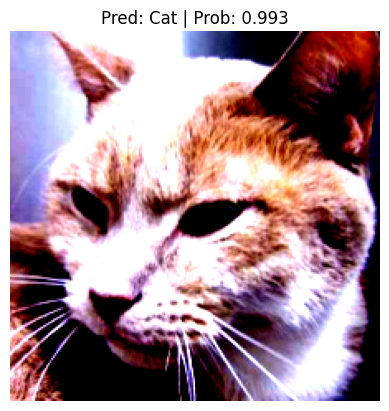

In [ ]:
#Model prediction on image above
pretrained_vit.to(device)

random_image_val_4 = random.randrange(0, 31)
img_example_4, label_example_4 = next(iter(dataset_subset_train))
img = img_example_4[random_image_val_4]

# Turn on model evaluation mode and inference mode
pretrained_vit.eval()
with torch.inference_mode():
    # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
    transformed_image = vit_transforms(img).unsqueeze(dim = 0)

    # Make a prediction on image with an extra dimension and send it to the target device
    target_image_pred = pretrained_vit(transformed_image.to(device))

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

# Convert prediction probabilities -> prediction labels
target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

# Plot image with predicted label and probability
plt.figure()
plt.imshow(img.permute(1, 2, 0))
plt.title(
    f"Pred: {classes[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
)
plt.axis(False)

In [ ]:
#Saving model params for future -- DBourke's utils function

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
    """Saves a PyTorch model to a target directory.

    Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

    Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
    """
    # Create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True,
                        exist_ok=True)

    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
    model_save_path = target_dir_path / model_name

    # Save the model state_dict()
    print(f"[INFO] Saving model to: {model_save_path}")
    torch.save(obj=model.state_dict(),
             f=model_save_path)


In [ ]:
save_model(model = pretrained_vit,
           target_dir = '/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs',
           model_name = 'pretrained_vit_binary_classifier.pth')

[INFO] Saving model to: /content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/pretrained_vit_binary_classifier.pth


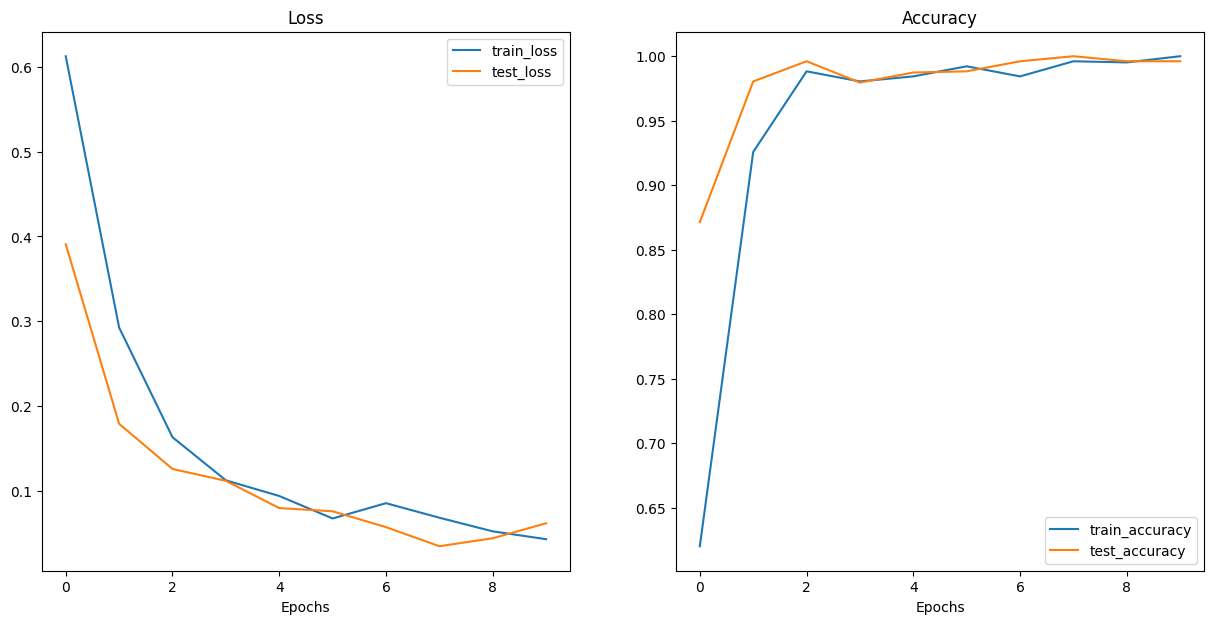

In [ ]:
#Plot loss curves with helper function
plot_loss_curves(
    results = pretrained_results
)

### 6) EfficientNet With Pretrained Weights and Fine-Tuning


Much smaller neural network architecture, with only 1/17th of the parameters. Should expect comparable performance.

In [ ]:
#Download model parameters from Torchvision
pretrained_efficientnet_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT #Extract the best available weights

#Create a new ViT model instance with the weights extracted
pretrained_efficientnet = torchvision.models.efficientnet_b0(weights=pretrained_efficientnet_weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 74.2MB/s]


In [ ]:
#Check pretrained transforms
efficient_net_transforms = pretrained_efficientnet_weights.transforms()
efficient_net_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
#Classifier input size: 1280, as opposed to previous
pretrained_efficientnet.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
#Freezing EfficientNet parameters for transfer learning
for parameter in pretrained_efficientnet.parameters():
  parameter.requires_grad = False

pretrained_efficientnet.classifier = nn.Linear(in_features = 1280, out_features = 2).to(device)

In [ ]:
#Set up parameters for training. Consider LR scheduling or decay.

optim = torch.optim.Adam(params = pretrained_efficientnet.parameters(), lr = 0.001)

#Create loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
#Check the model summary
!pip install torchinfo
from torchinfo import summary

summary(model = pretrained_efficientnet,
        input_size = (1, 3, 224, 224), #input size has changed to Batch_size, color_channels, H, W
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 20,
        row_settings = ["var_names"]
        )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 2]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [ ]:
#Train the model over 10 epochs, and visualize
pretrained_results_effnet = train(model = pretrained_efficientnet,
                           train_dataloader = dataset_subset_train,
                           test_dataloader = dataset_subset_test,
                           optimizer = optim,
                           loss_fn = loss_fn,
                           epochs = 5,
                           device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2346 | train_acc: 0.9316 | test_loss: 0.1642 | test_acc: 0.9609
Epoch: 2 | train_loss: 0.2062 | train_acc: 0.9268 | test_loss: 0.1532 | test_acc: 0.9639
Epoch: 3 | train_loss: 0.1754 | train_acc: 0.9258 | test_loss: 0.1470 | test_acc: 0.9522
Epoch: 4 | train_loss: 0.1618 | train_acc: 0.9414 | test_loss: 0.1066 | test_acc: 0.9796
Epoch: 5 | train_loss: 0.1635 | train_acc: 0.9375 | test_loss: 0.1082 | test_acc: 0.9600


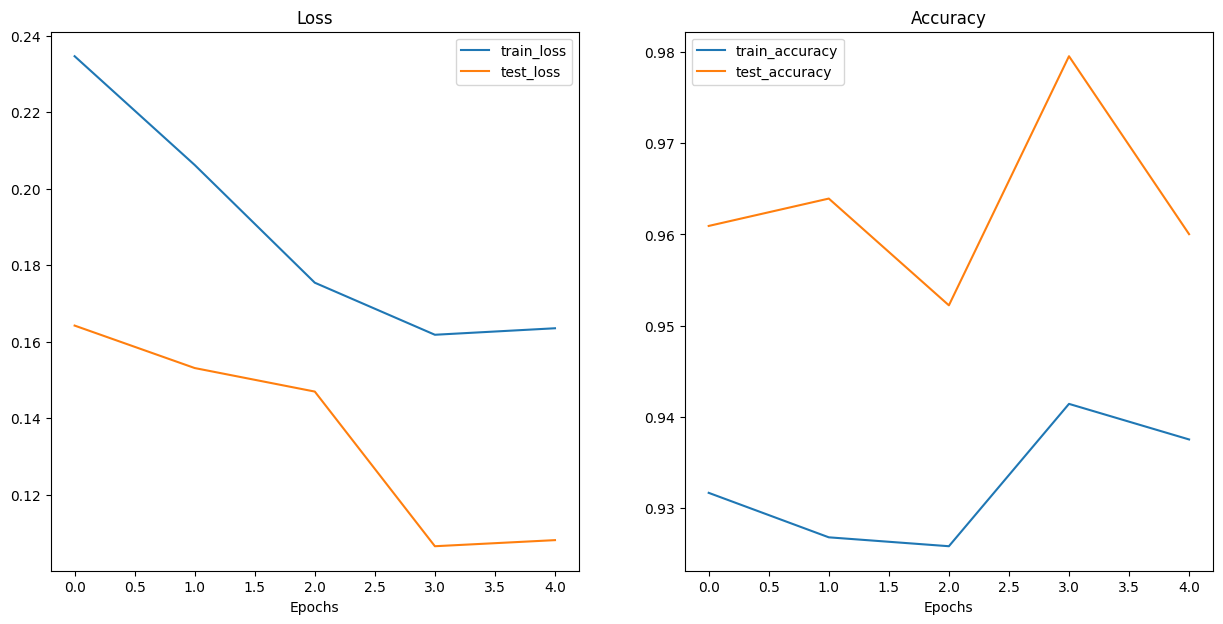

In [ ]:
#Visualize model results
plot_loss_curves(
    results = pretrained_results_effnet
)

The size of this image is: torch.Size([32, 3, 224, 224])


Text(0.5, 1.0, 'Class: Cat')

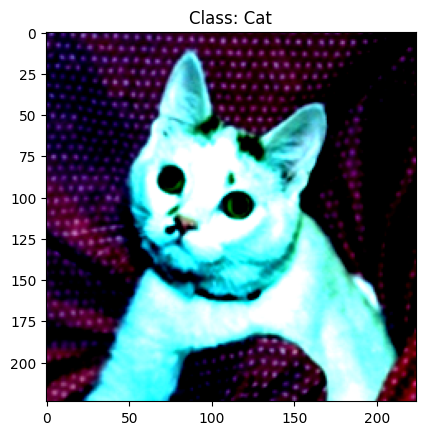

In [ ]:
#Visualize a prediction on a random image. First, retrieve a random image
img_example_3, label_example_3 = next(iter(dataset_subset_train))

print(f"The size of this image is: {img_example_3.shape}")

import random

random_image_val_3 = random.randrange(0, 31)

plt.imshow(img_example_3[random_image_val_3].squeeze(dim = 0).permute(1, 2, 0)),
plt.title(f"Class: {classes[label_example_3[random_image_val_3]]}")

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

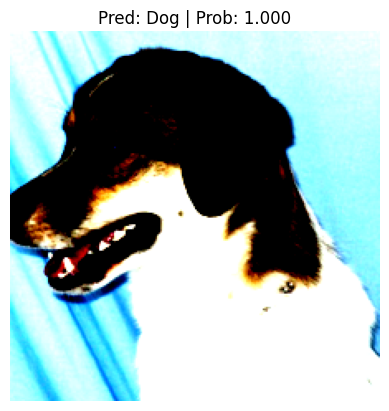

In [ ]:
#Plot image with softmax(logits), with ref: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/predictions.py
pretrained_efficientnet.to(device)

random_image_val_3 = random.randrange(0, 31)
img_example_3, label_example_3 = next(iter(dataset_subset_train))
img = img_example_3[random_image_val_3]

# Turn on model evaluation mode and inference mode
pretrained_efficientnet.eval()
with torch.inference_mode():
    # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
    transformed_image = efficient_net_transforms(img).unsqueeze(dim = 0)

    # Make a prediction on image with an extra dimension and send it to the target device
    target_image_pred = pretrained_efficientnet(transformed_image.to(device))

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

# Convert prediction probabilities -> prediction labels
target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

# Plot image with predicted label and probability
plt.figure()
plt.imshow(img.permute(1, 2, 0))
plt.title(
    f"Pred: {classes[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
)
plt.axis(False)

In [ ]:
#Save the EfficientNet model's state dict
save_model(
    model = pretrained_efficientnet,
    target_dir = '/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs',
    model_name = "pretrained_effnet_binary_classifier_V2.pth"
)

[INFO] Saving model to: /content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/pretrained_effnet_binary_classifier_V2.pth


### 7) Showcasing Performance With Gradio

In [ ]:
#Create instances of previously trained models

import torchvision
device = 'cuda' if torch.cuda.is_available() else 'cpu'

pretrained_vit = torchvision.models.vit_b_16(weights=None)
pretrained_vit.heads = nn.Linear(in_features = 768, out_features = 2).to(device)
for parameter in pretrained_vit.parameters():
  parameter.requires_grad = False

if device == 'cpu':
  vit_state_dict = torch.load('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/pretrained_vit_binary_classifier.pth', map_location=torch.device('cpu'))
else:
  vit_state_dict = torch.load('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/pretrained_vit_binary_classifier.pth')

pretrained_vit.load_state_dict(vit_state_dict)
pretrained_vit.to(device)

vit_transforms = torchvision.models.ViT_B_16_Weights.DEFAULT.transforms()

pretrained_efficientnet = torchvision.models.efficientnet_b0(weights=None)
pretrained_efficientnet.classifier = nn.Linear(in_features = 1280, out_features = 2).to(device)
for parameter in pretrained_efficientnet.parameters():
  parameter.requires_grad = False

if device == 'cpu':
  effnet_state_dict = torch.load('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/pretrained_effnet_binary_classifier_V2.pth', map_location=torch.device('cpu'))
else:
  effnet_state_dict = torch.load('/content/drive/MyDrive/Ford Summer 2025/Cats vs. Dogs/pretrained_effnet_binary_classifier_V2.pth')

pretrained_efficientnet.load_state_dict(effnet_state_dict)
pretrained_efficientnet.to(device)

#applying transforms, #2
efficient_net_transforms = torchvision.models.EfficientNet_B0_Weights.DEFAULT.transforms()

In [ ]:
#Create the prediction function -- from https://www.gradio.app/guides/image-classification-in-pytorch
#Gemini assistance: using the dropdown to link to prediction

import gradio as gr
import requests
from PIL import Image
from torchvision import transforms

labels = classes #classes have already been created previously

model_select = gr.Dropdown(
            ["ViT", "EffNet"], value=["ViT"], multiselect=False, label="Model", info="Which model should predictions be made with?"
  )

def predict(Input_Image, model):
  if model == "ViT":
    Input_Image = (vit_transforms(Input_Image).unsqueeze(0)).to(device)
    model = pretrained_vit
  else:
    Input_Image = (efficient_net_transforms(Input_Image).unsqueeze(0)).to(device)
    model_transforms = efficient_net_transforms
    model = pretrained_efficientnet

  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(Input_Image)[0], dim=0)
    confidences = {labels[i]: float(prediction[i]) for i in range(2)}
  return confidences

#Add a dropdown for model selection (https://www.gradio.app/docs/gradio/dropdown).


/usr/local/lib/python3.11/dist-packages/gradio/components/dropdown.py:230: UserWarning: The value passed into gr.Dropdown() is not in the list of choices. Please update the list of choices to include: ['ViT'] or set allow_custom_value=True.
  warnings.warn(


In [ ]:
import gradio as gr

with gr.Blocks() as demo:

  #Gemini suggestions
  with gr.Row():
    input_image = gr.Image(type="pil", label="Upload an Image")  # Use type="pil" for PIL Image input
    model_select = gr.Dropdown(
        ["ViT", "EffNet"], value="ViT", multiselect=False, label="Model", info="Which model should predictions be made with?"  # Correct the initial value to a single string
    )
    output_label = gr.Label(num_top_classes=2, label="Prediction")  # Display top 2 class labels

  # Link the components and function using an event listener
  input_image.change(
      fn=predict,
      inputs=[input_image, model_select],
      outputs=output_label,
  )

  #Mirrored functionality?
  model_select.change(
      fn=predict,
      inputs=[input_image, model_select],
      outputs=output_label,
  )

demo.launch(debug=True, pwa = True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://05637c2129bc598875.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://05637c2129bc598875.gradio.live


The following approach will be utilized when evaluating the classifier next week.

Thinking about utilizing HuggingFace's free hosting for next week's progress.

In [ ]:
#Plot scikit-learn confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test = [] #actual labels, 0 and 1 binary encoded
predictions = [] #actual predictions, 0 and 1 binary encoded

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot() #Create separate matrices for transformer and CNN

### 8) Conclusions

CNNs operate locally (generalization of one portion -- may see the "cat family" as a large dog), whereas transformers operate globally, connecting individual portions of images to other segments to consider each component's role in the image.